In [12]:
from __future__ import division
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import nltk, re, pprint
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
import sys
% matplotlib inline
import matplotlib.pyplot as plt
#sys.setdefaultencoding("utf-8")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Charlie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Create list of stopwords from custom list and built-in library

In [2]:
from nltk.corpus import stopwords
ENGLISH_STOP_WORDS = set(stopwords.words('english'))
random_words = ["miss", "mr", "mrs", "said", "jr", "ms"]
nytimes_words = ["photo", "nytimes", "nytoday", "com", "www"]
custom_words = "___ saying hours told pareles news people like new going time think saturday _____ briefing posted eastern want email stories weekdays sundays rundown latest look sign let convention week american year say house york make know day late comedy host cbs report character guest night admission admissions charge fee johnson petrusich smith ratliff cover reservations reservation dunning tickets tonight broadway chinen meeting japanese moses sponsored island information state united bowery little last also life much each two many tomorrow free org th minimum little Sonneh feet street man st door play one would years get even could way back around avenue streets says go really made something still got came come right always sanneh percent nd near co la sisario go says east village advance clinton san hes cotter made wa ha harlem de west thing sold another still around called things city see well beach men women woman man"
month_time_dayofweek = "january february march april may june july august september october november december sunday monday tuesday wednesday thursday friday morning noon night weekday weekend evening mondays tuesdays wednesdays thursdays fridays saturdays sundays jan feb mar aprl jun jul aug sep oct nov dec mon tues weds thurs fri sat sun pm month"
numbers_list = ["one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten"]
custom_words_list = custom_words.split()
month_time_day_list = month_time_dayofweek.split()

STOPLIST = set(stopwords.words('english') + random_words + numbers_list + list(month_time_day_list) + list(ENGLISH_STOP_WORDS) + nytimes_words + custom_words_list)
STOPLIST = list(STOPLIST)

##  Create dataframe, taking each corpus document and appending it to a column called "Contents"
**Note:each article was saved as an individual txt document with the date and URL in the file name 

In [5]:
path = 'corpora/williamsburg_hiphighretailbars'

myfolder = os.listdir(path)
articles = []

slash = '/'

for filename in myfolder:
    if filename.endswith('.txt'):
        date = filename[0:10]
        with open(path + slash + filename, 'r', encoding='utf-8') as fh:
            contents = fh.read()
            articles.append([contents, date])
            
raw = pd.DataFrame(articles, columns=['Contents','Date'])
print(raw)

                                               Contents        Date
0     EVEN people with faith in nothing, people who ...  2000-01-02
1     Correction Appended\nTENEMENTS, yes. Luxury ho...  2000-01-06
2     Two years ago, Joe, the man I lived with, sugg...  2000-01-14
3     IF they didn't play their luck out in furnitur...  2000-01-20
4     FOR years, Tequila's on Columbus held out a we...  2000-01-26
5     At Relish, a gleaming silver diner on Wythe St...  2000-02-06
6     Correction Appended\nGO out in Brooklyn? On th...  2000-02-11
7     BACK in the 60's, ''commune'' was often synony...  2000-02-20
8     Correction Appended\nA half a century after a ...  2000-02-21
9     The Real Form Girdle building, once a gritty f...  2000-02-27
10    Jane Pierce, manager of the Hamilton Fish Publ...  2000-03-14
11    Old-Fashioned Confections At Columbus Flea Mar...  2000-03-15
12    LIMOR TOMER, a Juilliard-trained pianist and f...  2000-03-26
13    THESE are among my favorite new restaurant

In [6]:
raw_no_duplicates = raw.drop_duplicates("Contents")
raw_no_duplicates

,Contents,Date
0,"EVEN people with faith in nothing, people who ...",2000-01-02
1,"Correction Appended\nTENEMENTS, yes. Luxury ho...",2000-01-06
2,"Two years ago, Joe, the man I lived with, sugg...",2000-01-14
3,IF they didn't play their luck out in furnitur...,2000-01-20
4,"FOR years, Tequila's on Columbus held out a we...",2000-01-26
5,"At Relish, a gleaming silver diner on Wythe St...",2000-02-06
6,Correction Appended\nGO out in Brooklyn? On th...,2000-02-11
7,"BACK in the 60's, ''commune'' was often synony...",2000-02-20
8,Correction Appended\nA half a century after a ...,2000-02-21
9,"The Real Form Girdle building, once a gritty f...",2000-02-27


Generate new rows for month and year and remove duplicates

In [17]:
raw_no_duplicates["Contents_Lower"] = raw_no_duplicates["Contents"].str.lower()
raw_no_duplicates["Contents_Clean"] = raw_no_duplicates["Contents_Lower"].apply(lambda x: x.replace("\n", " "))
raw_no_duplicates["Year"] = raw_no_duplicates["Date"].astype(str).str[0:4]
raw_no_duplicates["Month"] = raw_no_duplicates["Date"].astype(str).str[5:7]
raw_no_duplicates["Date_by_Month"] = raw_no_duplicates["Month"].map(str) + '-' + raw_no_duplicates["Year"].map(str)
raw_no_duplicates

C:\Users\Charlie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Charlie\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Charlie\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

,Contents,Date,Contents_Lower,Contents_Clean,Year,Month,Date_by_Month,Contents_nopunc,Contents_Tokenized,Contents_decode,Contents_Lemma
0,"EVEN people with faith in nothing, people who ...",2000-01-02,"even people with faith in nothing, people who ...","even people with faith in nothing, people who ...",2000,01,01-2000,even people with faith in nothing people who b...,<filter object at 0x000001785F30F278>,[],
1,"Correction Appended\nTENEMENTS, yes. Luxury ho...",2000-01-06,"correction appended\ntenements, yes. luxury ho...","correction appended tenements, yes. luxury hou...",2000,01,01-2000,correction appended tenements yes luxury housi...,<filter object at 0x000001785F14AEF0>,[],
2,"Two years ago, Joe, the man I lived with, sugg...",2000-01-14,"two years ago, joe, the man i lived with, sugg...","two years ago, joe, the man i lived with, sugg...",2000,01,01-2000,two years ago joe the man i lived with suggest...,<filter object at 0x000001785F013FD0>,[],
3,IF they didn't play their luck out in furnitur...,2000-01-20,if they didn't play their luck out in furnitur...,if they didn't play their luck out in furnitur...,2000,01,01-2000,if they didnt play their luck out in furniture...,<filter object at 0x000001785EEC0048>,[],
4,"FOR years, Tequila's on Columbus held out a we...",2000-01-26,"for years, tequila's on columbus held out a we...","for years, tequila's on columbus held out a we...",2000,01,01-2000,for years tequilas on columbus held out a welc...,<filter object at 0x000001785EB17400>,[],
5,"At Relish, a gleaming silver diner on Wythe St...",2000-02-06,"at relish, a gleaming silver diner on wythe st...","at relish, a gleaming silver diner on wythe st...",2000,02,02-2000,at relish a gleaming silver diner on wythe str...,<filter object at 0x000001785EAC5E48>,[],
6,Correction Appended\nGO out in Brooklyn? On th...,2000-02-11,correction appended\ngo out in brooklyn? on th...,correction appended go out in brooklyn? on the...,2000,02,02-2000,correction appended go out in brooklyn on the ...,<filter object at 0x000001785E772358>,[],
7,"BACK in the 60's, ''commune'' was often synony...",2000-02-20,"back in the 60's, ''commune'' was often synony...","back in the 60's, ''commune'' was often synony...",2000,02,02-2000,back in the s commune was often synonymous wit...,<filter object at 0x000001785E6AD518>,[],
8,Correction Appended\nA half a century after a ...,2000-02-21,correction appended\na half a century after a ...,correction appended a half a century after a p...,2000,02,02-2000,correction appended a half a century after a p...,<filter object at 0x000001785E5576D8>,[],
9,"The Real Form Girdle building, once a gritty f...",2000-02-27,"the real form girdle building, once a gritty f...","the real form girdle building, once a gritty f...",2000,02,02-2000,the real form girdle building once a gritty fa...,<filter object at 0x000001785E522668>,[],


Clean and preprocess text by: removing digits, stop words, and punctuation. Then tokenize words, stem them and lemmatize words for analysis.

In [21]:
import string
exclude = set(string.punctuation)

def is_good_utf8(str):
    try:
        str.decode("utf-8")
        return True
    except:
        return False
    
raw_no_duplicates["Contents_Clean"] = raw_no_duplicates["Contents_Clean"].apply(lambda x: ''.join([c for c in x if not c.isdigit()]))
raw_no_duplicates["Contents_nopunc"] = raw_no_duplicates["Contents_Clean"].apply(lambda x: ''.join([c for c in x if c not in exclude]))
raw_no_duplicates['Contents_Tokenized']=raw_no_duplicates["Contents_nopunc"].apply(lambda x : filter(is_good_utf8, filter(None,x.split(" "))))
raw_no_duplicates['Contents_decode']=raw_no_duplicates['Contents_Tokenized'].apply(lambda x: [word.decode('utf-8', ) for word in x])
raw_no_duplicates["Contents_Lemma"]=raw_no_duplicates["Contents_decode"].apply(lambda x : " ".join(lemma.lemmatize(word) for word in x))

C:\Users\Charlie\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Charlie\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Charlie\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [22]:
raw_no_duplicates

,Contents,Date,Contents_Lower,Contents_Clean,Year,Month,Date_by_Month,Contents_nopunc,Contents_Tokenized,Contents_decode,Contents_Lemma
0,"EVEN people with faith in nothing, people who ...",2000-01-02,"even people with faith in nothing, people who ...","even people with faith in nothing, people who ...",2000,01,01-2000,even people with faith in nothing people who b...,<filter object at 0x0000017857284160>,[],
1,"Correction Appended\nTENEMENTS, yes. Luxury ho...",2000-01-06,"correction appended\ntenements, yes. luxury ho...","correction appended tenements, yes. luxury hou...",2000,01,01-2000,correction appended tenements yes luxury housi...,<filter object at 0x00000178585225F8>,[],
2,"Two years ago, Joe, the man I lived with, sugg...",2000-01-14,"two years ago, joe, the man i lived with, sugg...","two years ago, joe, the man i lived with, sugg...",2000,01,01-2000,two years ago joe the man i lived with suggest...,<filter object at 0x00000178576585C0>,[],
3,IF they didn't play their luck out in furnitur...,2000-01-20,if they didn't play their luck out in furnitur...,if they didn't play their luck out in furnitur...,2000,01,01-2000,if they didnt play their luck out in furniture...,<filter object at 0x000001785E2F02B0>,[],
4,"FOR years, Tequila's on Columbus held out a we...",2000-01-26,"for years, tequila's on columbus held out a we...","for years, tequila's on columbus held out a we...",2000,01,01-2000,for years tequilas on columbus held out a welc...,<filter object at 0x0000017858F3D080>,[],
5,"At Relish, a gleaming silver diner on Wythe St...",2000-02-06,"at relish, a gleaming silver diner on wythe st...","at relish, a gleaming silver diner on wythe st...",2000,02,02-2000,at relish a gleaming silver diner on wythe str...,<filter object at 0x0000017858F1FD68>,[],
6,Correction Appended\nGO out in Brooklyn? On th...,2000-02-11,correction appended\ngo out in brooklyn? on th...,correction appended go out in brooklyn? on the...,2000,02,02-2000,correction appended go out in brooklyn on the ...,<filter object at 0x00000178577CACC0>,[],
7,"BACK in the 60's, ''commune'' was often synony...",2000-02-20,"back in the 60's, ''commune'' was often synony...","back in the 's, ''commune'' was often synonymo...",2000,02,02-2000,back in the s commune was often synonymous wit...,<filter object at 0x00000178563B7940>,[],
8,Correction Appended\nA half a century after a ...,2000-02-21,correction appended\na half a century after a ...,correction appended a half a century after a p...,2000,02,02-2000,correction appended a half a century after a p...,<filter object at 0x00000178589C6DA0>,[],
9,"The Real Form Girdle building, once a gritty f...",2000-02-27,"the real form girdle building, once a gritty f...","the real form girdle building, once a gritty f...",2000,02,02-2000,the real form girdle building once a gritty fa...,<filter object at 0x00000178589FD6A0>,[],


In [10]:
len(raw_no_duplicates)

1479

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation


tfidf_vectorizer = TfidfVectorizer(max_df = 0.4, min_df = 15,
                                   stop_words = STOPLIST)
tfidf = tfidf_vectorizer.fit_transform(raw_no_duplicates["Contents_nopunc"])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
nmf = NMF(n_components = 10, random_state=1, alpha=.1, l1_ratio=.5).fit(tfidf)

In [24]:
#function to display the topics and terms that make up each topic for both models -- will be called at the end

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [26]:

#LDA Model
no_features = 1000

#specify number of topic words
no_top_words = 10
no_topics = 10

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words=STOPLIST)
tf = tf_vectorizer.fit_transform(raw_no_duplicates["Contents_nopunc"])
tf_feature_names = tf_vectorizer.get_feature_names()
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)




C:\Users\Charlie\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [27]:
transformed_data = nmf.transform(tfidf)
len(transformed_data)

1479

In [28]:
print_top_words(nmf, tfidf_feature_names, 10)

Topic #0:
band songs album rock pop ballroom hall guitar singer theater
Topic #1:
building neighborhood apartment buildings housing apartments development market store million
Topic #2:
museum paintings exhibition gallery artists galleries photographs works painting artist
Topic #3:
dance ballet theater opera program company students dances dancers works
Topic #4:
tours museum students children tour exhibition members garden corner central
Topic #5:
jazz saxophonist drummer trio pianist bassist band songs quartet tenor
Topic #6:
bar restaurant chef wine restaurants menu food bars beer opened
Topic #7:
post daily mayor bloomberg police reports officials schools department school
Topic #8:
coffee espresso bottle beans blue freeman filter ounces water francisco
Topic #9:
theater previews musical opens closes directs production cast drama revival



In [29]:
print_top_words(lda, tf_feature_names, no_top_words)


Topic #0:
mayor post company public officials department bloomberg million brooklyn plan
Topic #1:
bar restaurant brooklyn coffee food restaurants wine opened beer bars
Topic #2:
park children museum students manhattan brooklyn tour members tours exhibition
Topic #3:
brooklyn school park schools manhattan high bridge students bronx borough
Topic #4:
theater dance music company center festival program opera ballet production
Topic #5:
building neighborhood manhattan brooklyn buildings apartment development space housing market
Topic #6:
dance music theater program opera manhattan students first company brooklyn
Topic #7:
art museum show artists gallery work paintings works exhibition artist
Topic #8:
band music songs jazz album rock brooklyn manhattan pop side
Topic #9:
brooklyn first home store young place good friends work never



In [30]:
#NMF Topic Names
Topic_Names = {1: "Live Music",
               2: "Neighborhood Life",
               3: "Galleries and Art Exhibitions",
               4: "Dance & Theater",
               5: "Tours & Tourism",
               6: "Jazz consumption",
               7: "Food & Restaurant Culture",
               8: "Public Safety", 
               9: "Residential Development", 
              10: "Entertainment Production"}

In [31]:
def zero_equals_1(x): 
    if x != 0:
        return 1
    else:
        return x

In [32]:
transformed_data = pd.DataFrame(transformed_data)
article_topics = transformed_data.applymap(zero_equals_1)
raw_data = raw_no_duplicates.reset_index()
article_topics["Date"] = raw_data["Date_by_Month"]
article_topics["Year"] = raw_data["Year"]
article_topics["Article_Num"] = range(1, len(article_topics) + 1)
melted_df = pd.melt(article_topics, id_vars = ["Article_Num", "Date", "Year"], var_name = "Topic_Num")

In [33]:
melted_df = melted_df[-melted_df["Topic_Num"].isin([0, 26])]

In [34]:
import calendar
def extract_month_year(date):
    month = int(date[0:2])
    month_name = calendar.month_name[month]
    year = int(date[2:])
    return month_name + " " + str(year)

In [35]:
melted_df["Month_Year"] = melted_df["Date"].apply(lambda x: extract_month_year(x))

In [36]:
topic_num_to_name = pd.DataFrame.from_dict(Topic_Names, orient = "index").reset_index()
topic_num_to_name.columns = ["Topic_Num", "Topic_Name"]
final_df = melted_df.merge(topic_num_to_name, on = "Topic_Num")

In [37]:
final_df

,Article_Num,Date,Year,Topic_Num,value,Month_Year,Topic_Name
0,1,01-2000,2000,1,1.0,January -2000,Live Music
1,2,01-2000,2000,1,1.0,January -2000,Live Music
2,3,01-2000,2000,1,1.0,January -2000,Live Music
3,4,01-2000,2000,1,1.0,January -2000,Live Music
4,5,01-2000,2000,1,1.0,January -2000,Live Music
5,6,02-2000,2000,1,1.0,February -2000,Live Music
6,7,02-2000,2000,1,1.0,February -2000,Live Music
7,8,02-2000,2000,1,1.0,February -2000,Live Music
8,9,02-2000,2000,1,1.0,February -2000,Live Music
9,10,02-2000,2000,1,1.0,February -2000,Live Music


In [38]:
final_df = final_df.groupby(["Month_Year", "Year", "Topic_Num", "Topic_Name"]).sum().reset_index()

In [39]:
final_df = final_df.rename(columns={'Topic_Name': 'Topic Name'})

In [40]:
final_df['Month_Year'] = final_df['Month_Year'].str.replace('-',' ')
final_df

,Month_Year,Year,Topic_Num,Topic Name,Article_Num,value
0,April 2000,2000,1,Live Music,133,7.0
1,April 2000,2000,2,Neighborhood Life,133,3.0
2,April 2000,2000,3,Galleries and Art Exhibitions,133,0.0
3,April 2000,2000,4,Dance & Theater,133,1.0
4,April 2000,2000,5,Tours & Tourism,133,0.0
5,April 2000,2000,6,Jazz consumption,133,3.0
6,April 2000,2000,7,Food & Restaurant Culture,133,0.0
7,April 2000,2000,8,Public Safety,133,0.0
8,April 2000,2000,9,Residential Development,133,0.0
9,April 2001,2001,1,Live Music,405,5.0


In [41]:
order = ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010"]

# Viz for Live Music

[Text(0,0.5,'Number of Articles'),
 Text(0.5,0,'Year'),
 Text(0.5,1,'Articles on Live Music')]

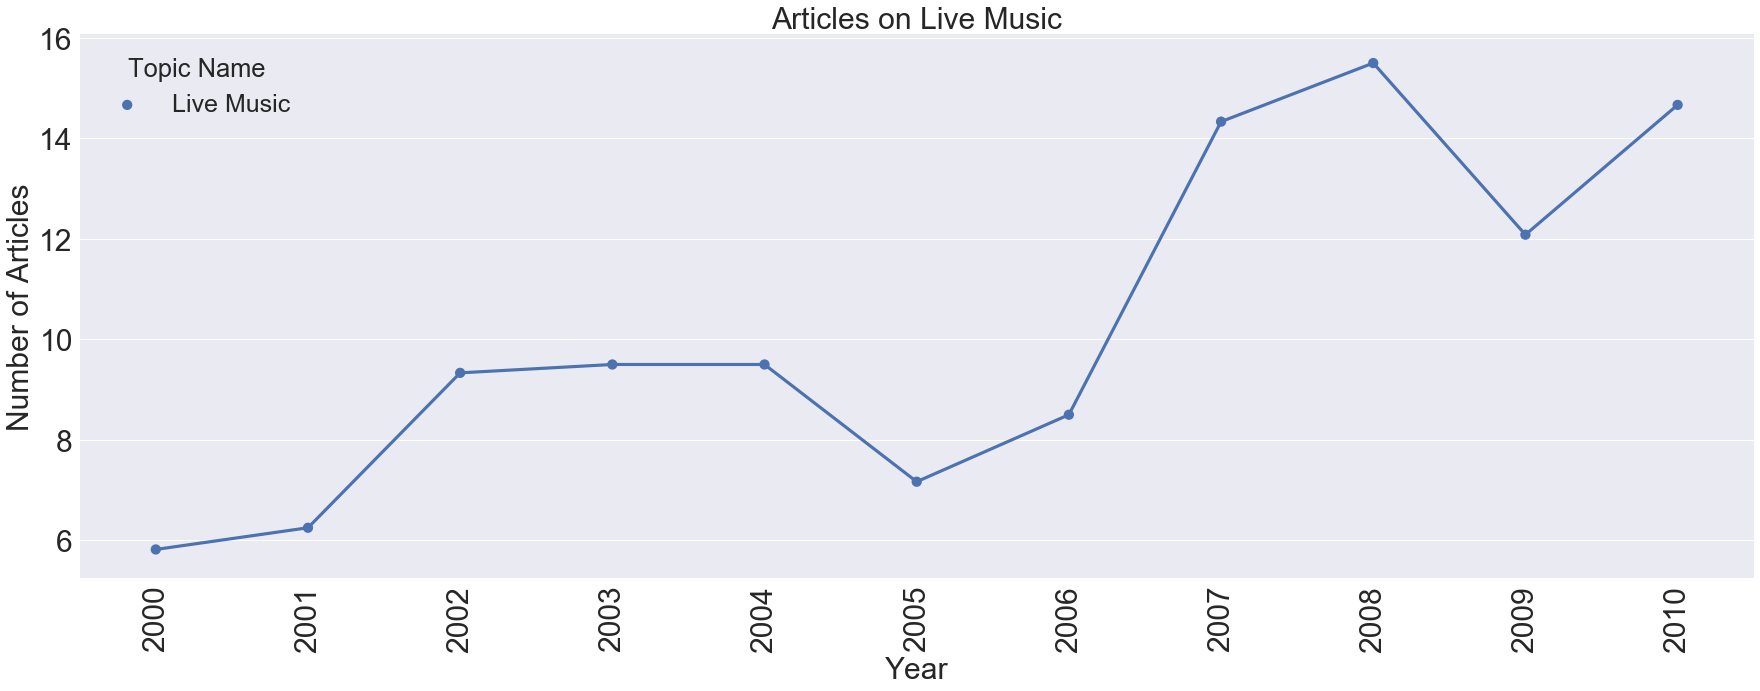

In [42]:
rc={'xtick.labelsize': 30, 'ytick.labelsize': 30, 'axes.labelsize': 30, 'font.size': 30, 'legend.fontsize': 25.0, 'axes.titlesize': 30, "figure.figsize": [30, 10]}
sns.set(rc=rc)
one_topic = final_df[final_df["Topic Name"] == "Live Music"]
g = sns.pointplot(ci = None, x = one_topic["Year"], y = one_topic["value"], order = order, hue = one_topic["Topic Name"])
plt.xticks(rotation=90)
g.set(xlabel = "Year", ylabel = "Number of Articles", title = "Articles on Live Music")

# Viz for Neighborhood Life

[Text(0,0.5,'Number of Articles'),
 Text(0.5,0,'Year'),
 Text(0.5,1,'Articles on Live Music')]

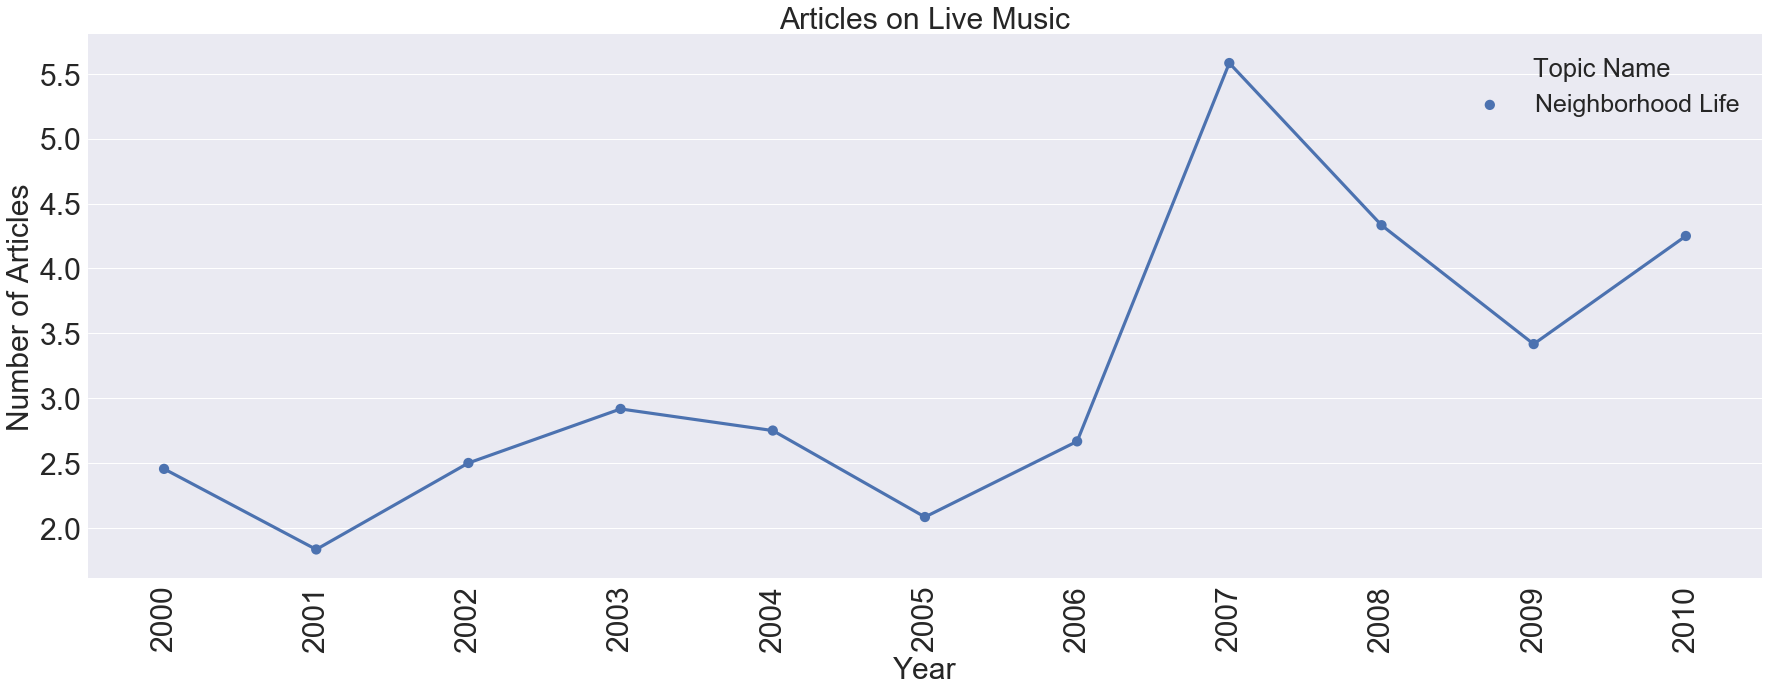

In [43]:
rc={'xtick.labelsize': 30, 'ytick.labelsize': 30, 'axes.labelsize': 30, 'font.size': 30, 'legend.fontsize': 25.0, 'axes.titlesize': 30, "figure.figsize": [30, 10]}
sns.set(rc=rc)
one_topic = final_df[final_df["Topic Name"] == "Neighborhood Life"]
g = sns.pointplot(ci = None, x = one_topic["Year"], y = one_topic["value"], order = order, hue = one_topic["Topic Name"])
plt.xticks(rotation=90)
g.set(xlabel = "Year", ylabel = "Number of Articles", title = "Articles on Live Music")

# Combining Topics into a Single Plot

#NMF Topic Names
Topic_Names = {1: "Live Music",
               2: "Neighborhood Life",
               3: "Galleries and Art Exhibitions",
               4: "Dance & Theater",
               5: "Tours & Tourism",
               6: "Jazz consumption",
               7: "Food & Restaurant Culture",
               8: "Public Safety", 
               9: "Residential Development", 
              10: "Entertainment Production"}